# PCA

In [1]:
# Importamos librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.decomposition import PCA

In [2]:
# Para que no se desplieguen las advertencias
warnings.filterwarnings("ignore")

## SIAP

### Cargar datos

In [3]:
# URL al archivo parquet en el repositorio
url_siap = r'C:\Users\jcbar\OneDrive\Documentos\Ingeniería de Características\Proyecto\Segunda parte\Tidy_preprocessed\SIAP_preprocessed.parquet'
# Cargar archivo parquet como DataFrame
df_siap = pd.read_parquet(url_siap)
# Inspeccionar primeros elementos del DataFrame
df_siap.head()

,Entidad,Municipio,Superficie Sembrada Acumulada,Superficie Cosechada Acumulada,Superficie Siniestrada Acumulada,Produccion Acumulada,Rendimiento,Año,Mes,Cultivo,Superficie Sembrada,Superficie Cosechada,Superficie Siniestrada,Produccion
0,Baja California Sur,La Paz,8.0,0.0,0.0,0.0,0.0,2020,Enero,Berenjena,8.0,0.0,0.0,0.0
1,Baja California Sur,Los Cabos,3.0,0.0,0.0,0.0,0.0,2020,Enero,Berenjena,3.0,0.0,0.0,0.0
2,Morelos,Miacatlán,0.4,0.0,0.0,0.0,0.0,2020,Enero,Berenjena,0.4,0.0,0.0,0.0
3,Nayarit,Santiago Ixcuintla,60.0,0.0,0.0,0.0,0.0,2020,Enero,Berenjena,60.0,0.0,0.0,0.0
4,Quintana Roo,Bacalar,12.5,10.0,0.0,49.0,4.9,2020,Enero,Berenjena,12.5,10.0,0.0,49.0


In [4]:
# Seleccionar solo las columnas de interés
selected_columns = ['Superficie Sembrada', 'Superficie Cosechada', 'Superficie Siniestrada', 'Produccion', 'Rendimiento']
df_selected = df_siap[selected_columns]

# Crear un objeto PCA y ajustarlo a los datos
n_components = 2
pca = PCA(n_components=n_components)

pca.fit(df_selected)

# Obtener las componentes principales y la varianza explicada
principal_components = pca.transform(df_selected)
explained_variance = pca.explained_variance_ratio_

# Crear un nuevo DataFrame con las componentes principales
columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
df_pca = pd.DataFrame(data=principal_components, columns=columns)

# Imprimir el DataFrame con las componentes principales
print(df_pca)

# Imprimir la varianza explicada por cada componente principal
print("\nVarianza explicada por cada componente principal:\n")
print(explained_variance)

               PC1        PC2
0      -350.436451 -20.619926
1      -350.503300 -25.491472
2      -350.538062 -28.024676
3      -349.741212  30.044150
4      -300.867817 -15.300625
...            ...        ...
377932 -335.417719 -28.260620
377933 -350.543255 -28.414706
377934 -350.543410 -28.414400
377935 -350.543410 -28.414400
377936 -350.543410 -28.414400

[377937 rows x 2 columns]

Varianza explicada por cada componente principal:

[0.93082897 0.03888509]


Uniremos nuestros dataframes para tenerlo todo en uno y graficar en base a este. Primero validemos que tengan el mismo tamaño para despues proceder a realizar un merge en base al index de estos dos dataframes.



In [5]:
df_pca.shape

(377937, 2)

In [6]:
df_siap.shape

(377937, 14)

In [7]:

df_siap_pca = pd.merge(df_siap, df_pca, left_index=True, right_index=True)

df_siap_pca.head()

,Entidad,Municipio,Superficie Sembrada Acumulada,Superficie Cosechada Acumulada,Superficie Siniestrada Acumulada,Produccion Acumulada,Rendimiento,Año,Mes,Cultivo,Superficie Sembrada,Superficie Cosechada,Superficie Siniestrada,Produccion,PC1,PC2
0,Baja California Sur,La Paz,8.0,0.0,0.0,0.0,0.0,2020,Enero,Berenjena,8.0,0.0,0.0,0.0,-350.436451,-20.619926
1,Baja California Sur,Los Cabos,3.0,0.0,0.0,0.0,0.0,2020,Enero,Berenjena,3.0,0.0,0.0,0.0,-350.503300,-25.491472
2,Morelos,Miacatlán,0.4,0.0,0.0,0.0,0.0,2020,Enero,Berenjena,0.4,0.0,0.0,0.0,-350.538062,-28.024676
3,Nayarit,Santiago Ixcuintla,60.0,0.0,0.0,0.0,0.0,2020,Enero,Berenjena,60.0,0.0,0.0,0.0,-349.741212,30.044150
4,Quintana Roo,Bacalar,12.5,10.0,0.0,49.0,4.9,2020,Enero,Berenjena,12.5,10.0,0.0,49.0,-300.867817,-15.300625


Sustituiremos los valores de la columna Cultivo por el ID que se encuentra en el catalogo de cultivos

In [8]:
cat_cultivo = pd.read_csv(r'C:\Users\jcbar\OneDrive\Documentos\Ingeniería de Características\Proyecto\Primera parte\Catalogos_API_SIAP\Cultivo.csv').set_index('Name')['ID']
df_siap_pca['Cultivo'] = df_siap_pca['Cultivo'].map(cat_cultivo)

#### Visualización de componentes principales

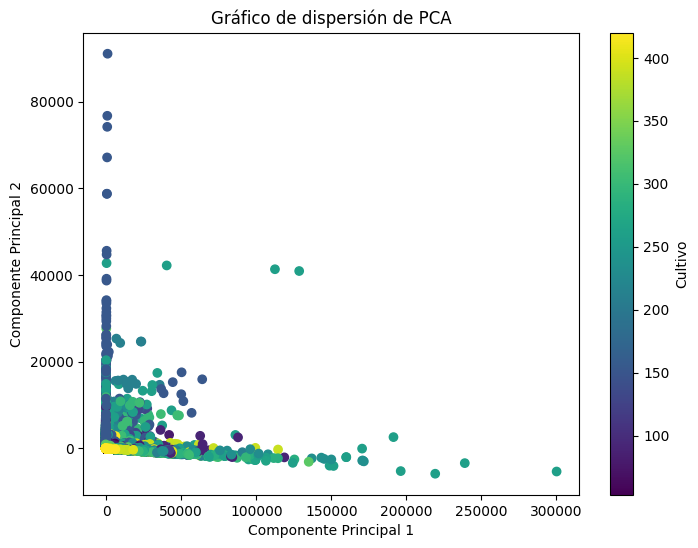

In [9]:
# Supongamos que tus componentes principales se llaman "PC1" y "PC2"
plt.figure(figsize=(8, 6))
plt.scatter(df_siap_pca['PC1'], df_siap_pca['PC2'], c=df_siap_pca['Cultivo'], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Gráfico de dispersión de PCA')

plt.colorbar(label='Cultivo')
plt.show()

#### Resultados

La aplicación del PCA resultó en la obtención de dos componentes principales, que representan combinaciones lineales de las variables originales. Además, se obtuvo la varianza explicada por cada componente principal:

| Componente Principal | Varianza     |
|----------------------|--------------|
| PC1                  | 0.99492654   |
| PC2                  | 0.00443579   |

Interpretación de los Componentes Principales:


- **Primer Componente Principal (PC1):** Explica la mayor parte de la variabilidad en los datos, con una varianza cercana al 99.5%. Se presume que este componente puede estar relacionado con las direcciones principales de variabilidad en las variables originales.

- **Segundo Componente Principal (PC2):** Explica una cantidad significativamente menor de la variabilidad total, alrededor del 0.44%. PC2 captura patrones secundarios o menos dominantes en los datos. Aunque su contribución es baja en comparación con PC1, aún podría contener información relevante.

La visualización gráfica revela patrones, aunque su interpretación requeriría la aplicación de diversas técnicas y la consulta de expertos en el tema.

## SNIIM

### Cargar datos

In [10]:
# URL al archivo parquet en el repositorio
url_sniim = r'C:\Users\jcbar\OneDrive\Documentos\Ingeniería de Características\Proyecto\Segunda parte\Tidy_preprocessed\SNIIM_preprocessed_diario.parquet'
# Cargar archivo parquet como DataFrame
df_sniim = pd.read_parquet(url_sniim)
# Inspeccionar primeros elementos del DataFrame
df_sniim.head()

,Fecha,Origen,Destino,Cultivo SIAP,Precio Minimo,Precio Maximo,Precio Frecuente
0,2020-01-02,Aguascalientes,Aguascalientes: Centro Comercial Agropecuario ...,Brócoli,12.00,14.00,13.00
1,2020-01-02,Aguascalientes,Aguascalientes: Centro Comercial Agropecuario ...,Calabacita,11.33,12.67,12.00
2,2020-01-02,Aguascalientes,Aguascalientes: Centro Comercial Agropecuario ...,Coliflor,13.00,15.00,14.00
3,2020-01-02,Aguascalientes,Aguascalientes: Centro Comercial Agropecuario ...,Guayaba,8.75,9.58,9.17
4,2020-01-02,Aguascalientes,Aguascalientes: Centro Comercial Agropecuario ...,Lechuga,6.00,8.00,7.00


In [11]:
# Seleccionar solo las columnas de interés
selected_columns = ['Precio Minimo','Precio Maximo', 'Precio Frecuente']
df_selected = df_sniim[selected_columns]

# Crear un objeto PCA y ajustarlo a los datos
n_components = 2
pca = PCA(n_components=n_components)

pca.fit(df_selected)

# Obtener las componentes principales y la varianza explicada
principal_components = pca.transform(df_selected)
explained_variance = pca.explained_variance_ratio_

# Crear un nuevo DataFrame con las componentes principales
columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
df_pca = pd.DataFrame(data=principal_components, columns=columns)

# Imprimir el DataFrame con las componentes principales
print(df_pca)

# Imprimir la varianza explicada por cada componente principal
print("\nVarianza explicada por cada componente principal:\n")
print(explained_variance)

               PC1       PC2
0       -28.170634 -0.298480
1       -29.913122 -0.724160
2       -26.439068 -0.339173
3       -34.827651 -0.969126
4       -38.560028 -0.054319
...            ...       ...
286031  -23.193636  2.737099
286032  -14.351207 -2.037282
286033  157.073800 -6.065944
286034  -38.560028 -0.054319
286035   -2.723257  1.236141

[286036 rows x 2 columns]

Varianza explicada por cada componente principal:

[0.99337935 0.00537286]


Unión de los datos

In [12]:
print(df_pca.shape)
print(df_sniim.shape)

(286036, 2)
(286036, 7)


In [13]:

df_sniim_pca = pd.merge(df_sniim, df_pca, left_index=True, right_index=True)

Sustituiremos los valores de la columna Cultivo por el ID que se encuentra en el catalogo de cultivos

In [14]:
df_sniim_pca['Cultivo SIAP'] = df_sniim_pca['Cultivo SIAP'].map(cat_cultivo)

#### Visualización de componentes principales

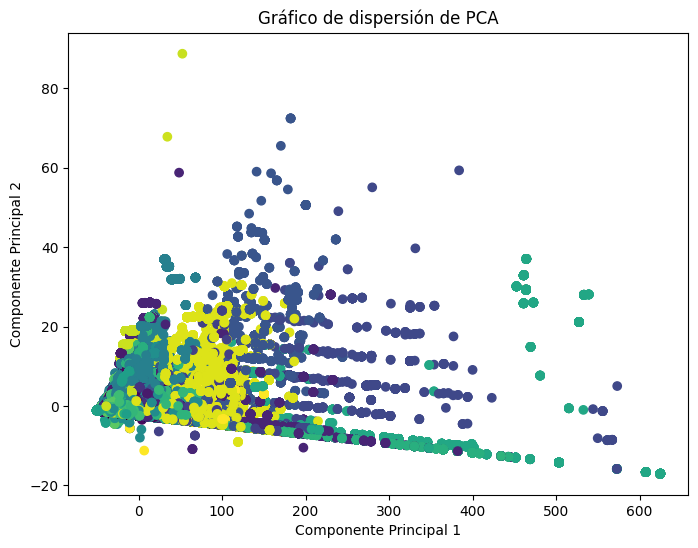

In [15]:
# Supongamos que tus componentes principales se llaman "PC1" y "PC2"
plt.figure(figsize=(8, 6))
plt.scatter(df_sniim_pca['PC1'], df_sniim_pca['PC2'], c=df_sniim_pca['Cultivo SIAP'], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Gráfico de dispersión de PCA')

plt.show()

### Resultados

La aplicación del PCA resultó en la obtención de dos componentes principales, que representan combinaciones lineales de las variables originales. Además, se obtuvo la varianza explicada por cada componente principal:

| Componente Principal | Varianza     |
|----------------------|--------------|
| PC1                  | 0.98890202   |
| PC2                  | 0.00887424   |

Interpretación de los Componentes Principales:

- **Primer Componente Principal (PC1):** Explica la mayor parte de la variabilidad en los datos, con una varianza cercana al 98.9%. Se presume que este componente puede estar relacionado con las direcciones principales de variabilidad en las variables originales.

- **Segundo Componente Principal (PC2):** Explica una cantidad significativamente menor de la variabilidad total, alrededor del 0.89%. PC2 captura patrones secundarios o menos dominantes en los datos. Aunque su contribución es baja en comparación con PC1, aún podría contener información relevante.

La visualización gráfica revela patrones, aunque su interpretación requeriría la aplicación de diversas técnicas y la consulta de expertos en el tema.

## SIAP - SNIIM

### Cargar datos

In [16]:
# URL al archivo parquet en el repositorio
url_merge = r'C:\Users\jcbar\OneDrive\Documentos\Ingeniería de Características\Proyecto\Segunda parte\Tidy_preprocessed\SIAP_SNIIM_preprocessed.parquet'
# Cargar archivo parquet como DataFrame
df_merge = pd.read_parquet(url_merge)
# Inspeccionar primeros elementos del DataFrame
df_merge.head()

,Año,Mes,Entidad,Cultivo,Superficie Sembrada Acumulada,Superficie Cosechada Acumulada,Superficie Siniestrada Acumulada,Produccion Acumulada,Rendimiento,Superficie Sembrada,Superficie Cosechada,Superficie Siniestrada,Produccion,Precio Minimo,Precio Maximo,Precio Frecuente
0,2020,Enero,Aguascalientes,Brócoli,440.0,0.0,0.0,0.0,0.00,440.0,0.0,0.0,0.0,246.00,290.00,268.00
1,2020,Enero,Aguascalientes,Calabacita,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1147.76,1232.18,1199.57
2,2020,Enero,Aguascalientes,Coliflor,152.0,0.0,0.0,0.0,0.00,152.0,0.0,0.0,0.0,265.00,309.00,287.00
3,2020,Enero,Aguascalientes,Guayaba,6187.9,0.0,0.0,0.0,0.00,6187.9,0.0,0.0,0.0,192.50,210.85,201.65
4,2020,Enero,Aguascalientes,Lechuga,1468.0,650.0,0.0,23946.0,36.84,1468.0,650.0,0.0,23946.0,118.00,162.00,140.00


In [17]:
# Seleccionar solo las columnas de interés
selected_columns = ['Precio Minimo','Precio Maximo', 'Precio Frecuente'] + ['Superficie Sembrada', 'Superficie Cosechada', 'Superficie Siniestrada', 'Produccion', 'Rendimiento']
df_selected = df_merge[selected_columns]

# Crear un objeto PCA y ajustarlo a los datos
n_components = 2
pca = PCA(n_components=n_components)

pca.fit(df_selected)

# Obtener las componentes principales y la varianza explicada
principal_components = pca.transform(df_selected)
explained_variance = pca.explained_variance_ratio_

# Crear un nuevo DataFrame con las componentes principales
columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
df_pca = pd.DataFrame(data=principal_components, columns=columns)

# Imprimir el DataFrame con las componentes principales
print(df_pca)

# Imprimir la varianza explicada por cada componente principal
print("\nVarianza explicada por cada componente principal:\n")
print(explained_variance)

               PC1          PC2
0     -9587.117374   136.556263
1     -9589.341110  -262.286168
2     -9594.460401  -146.214393
3     -9437.435695  5791.649074
4     14373.501835   396.882113
...            ...          ...
8418  -9595.269928  -284.178117
8419  -9596.297973  -287.951706
8420  -9599.130153  -298.362904
8421  -9599.269929  -298.903952
8422  -9596.714720  -289.486142

[8423 rows x 2 columns]

Varianza explicada por cada componente principal:

[0.96560923 0.02631997]


Unión de los datos

In [18]:
print(df_pca.shape)
print(df_merge.shape)

(8423, 2)
(8423, 16)


In [19]:
df_merge_pca = pd.merge(df_merge, df_pca, left_index=True, right_index=True)

Sustituiremos los valores de la columna Cultivo por el ID que se encuentra en el catalogo de cultivos

In [20]:
df_merge_pca['Cultivo'] = df_merge_pca['Cultivo'].map(cat_cultivo)

#### Visualización de componentes principales

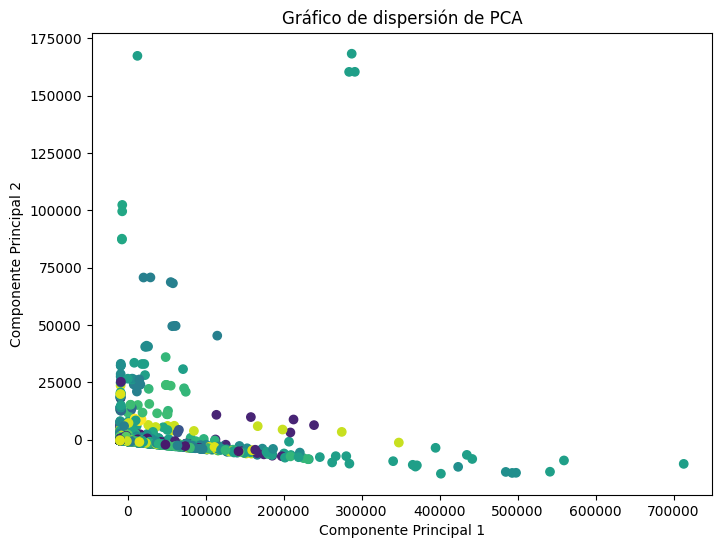

In [21]:
# Supongamos que tus componentes principales se llaman "PC1" y "PC2"
plt.figure(figsize=(8, 6))
plt.scatter(df_merge_pca['PC1'], df_merge_pca['PC2'], c=df_merge_pca['Cultivo'], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Gráfico de dispersión de PCA')

plt.show()

#### Resultados

| Componente Principal | Varianza     |
|----------------------|--------------|
| PC1                  | 0.96560923   |
| PC2                  | 0.02631997   |
